###Installation of TensorFlow 2.0

In [0]:
import tensorflow as tf; print(tf.__version__)

2.0.0-alpha0


In [0]:
!pip install tensorflow==2.0.0-alpha0

###Loading the MNIST data

In [0]:
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

(X_Train, Y_Train), (X_Test, Y_Test) = mnist.load_data() 

   16384/11490434 [..............................] - ETA: 0s

Using TensorFlow backend.


11501568/11490434 [==============================] - 0s 0us/step


###Translation of data

In [0]:
X_Train_G3 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_G3 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32') 

###Standardize feature data & Label Onehot-encoding

In [0]:
X_Train_G3_norm = X_Train_G3 / 255  
X_Test_G3_norm = X_Test_G3 /255  
  
Y_TrainOneHot = np_utils.to_categorical(Y_Train)  
Y_TestOneHot = np_utils.to_categorical(Y_Test) 

###Configuration of Neural Network

In [0]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))
# Create CN layer 2 
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))

# Add Dropout layer  
model.add(Dropout(0.25))

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))

# Create CN layer 3  
model.add(Conv2D(filters=64,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu')) 
# Create CN layer 4
model.add(Conv2D(filters=64,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))

# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))
 
# Add Dropout layer  
model.add(Dropout(0.25))

###Construct model

In [0]:
model.add(Flatten())

model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5)) 

model.add(Dense(10, activation='softmax')) 

model.summary()  
print("") 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

###Learning Rate Optimization

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)

###Model training (Back Propagation) 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_Train_G3_norm,  
                          y=Y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 815s - loss: 0.2823 - accuracy: 0.9101 - val_loss: 0.0638 - val_accuracy: 0.9826
Epoch 2/10
48000/48000 - 739s - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0405 - val_accuracy: 0.9892
Epoch 3/10
48000/48000 - 690s - loss: 0.0480 - accuracy: 0.9860 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 4/10
48000/48000 - 867s - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0293 - val_accuracy: 0.9909
Epoch 5/10
48000/48000 - 508s - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0255 - val_accuracy: 0.9923
Epoch 6/10
48000/48000 - 507s - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0263 - val_accuracy: 0.9921
Epoch 7/10
48000/48000 - 507s - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 8/10
48000/48000 - 507s - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0259 - val_accuracy: 0.9925
Epoch 9/10
48000/48000 - 510s - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0240 - val_accuracy: 0.9

###Training accuracy vs Evaluation accuracy

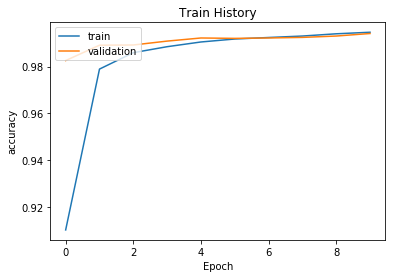

In [9]:
import os

def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys() 

import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
    
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

####Evaluate model accuracy

In [10]:
scores = model.evaluate(X_Test_G3_norm, Y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 25s 3ms/sample - loss: 0.0155 - accuracy: 0.9951
	[Info] Accuracy of testing data = 99.5%


###Confusion Matrix 

In [11]:
print("\t[Info] Making prediction of X_Test_G3_norm")  
prediction = model.predict_classes(X_Test_G3_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(Y_Test, prediction, rownames=['label'], colnames=['predict']))

	[Info] Making prediction of X_Test_G3_norm
()
	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 6 4 2]

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        978     0     0     0    0    0    1     1    0    0
1          0  1134     1     0    0    0    0     0    0    0
2          0     0  1030     0    0    0    0     2    0    0
3          0     0     0  1007    0    2    0     0    1    0
4          0     1     0     0  974    0    3     0    0    4
5          1     0     0     4    0  883    2     0    0    2
6          2     2     0     0    0    0  954     0    0    0
7          0     2     4     0    0    0    0  1022    0    0
8          1     0     0     1    0    1    0     0  970    1
9          1     0     1     0    3    2    0     3    0  999



In [0]:
model.save('MNIST_0.5%_Howard_Huang_Group_3_Modified_Model.h5')